**Download** (right-click, save target as ...) this page as a jupyterlab notebook [Lab17](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab17/Lab17.ipynb)

___

# <font color=darkred>Laboratory 17: "Reject it or Fail!" or a Lab on "Hypothesis Testing" </font>

LAST NAME, FIRST NAME

R00000000

ENGR 1330 Laboratory 17 - In-Lab 

___


In [2]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

atomickitty
sensei
/opt/jupyterhub/bin/python3
3.8.10 (default, Sep 28 2021, 16:10:42) 
[GCC 9.3.0]
sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0)


#### Remember where we left our last laboratory session? 

![](https://media.tumblr.com/tumblr_mbui1kpPoU1rxdw8g.gif)


Accept my gratitude if you do! But in case you saw Agent K and Agent J sometime after Thursday or for any other reason, do not recall it, here is where were we left things:

We had a dataset with two sets of numbers (Set 1 and Set2). We did a bunch of stuff and decided that the Normal Distribution Data Model provides a good fit for both of sample sets. We, then used the right parameters for Normal Data Model (mean and standard deviation) to generate one new sample set based on each set. We then looked at the four sets next to each other and asked a rather simple question: Are these sets different or similar?

While we reached some assertions based on visual assessment, we did not manage to solidify our assertation in any numerical way. Well, now is the time! 

In [4]:
#Load the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Lets get our data from [http://54.243.252.9/engr-1330-webroot/8-Labs/Lab17/lab14_E1data.csv](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab17/lab14_E1data.csv)

In [5]:
#Previously ...
data = pd.read_csv("lab14_E1data.csv") 
set1 = np.array(data['Set1'])
set2 = np.array(data['Set2'])
mu1 = set1.mean()
sd1 = set1.std()
mu2 = set2.mean()
sd2 = set2.std()
set1_s = np.random.normal(mu1, sd1, 100)
set2_s = np.random.normal(mu2, sd2, 100)
data2 = pd.DataFrame({'Set1s':set1_s,'Set2s':set2_s})


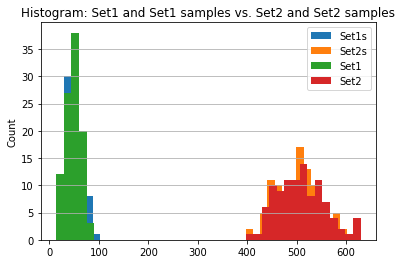

In [6]:
#Previously ...
fig, ax = plt.subplots()
data2.plot.hist(density=False, ax=ax, title='Histogram: Set1 and Set1 samples vs. Set2 and Set2 samples', bins=40)
data.plot.hist(density=False, ax=ax, bins=40)

ax.set_ylabel('Count')
ax.grid(axis='y')

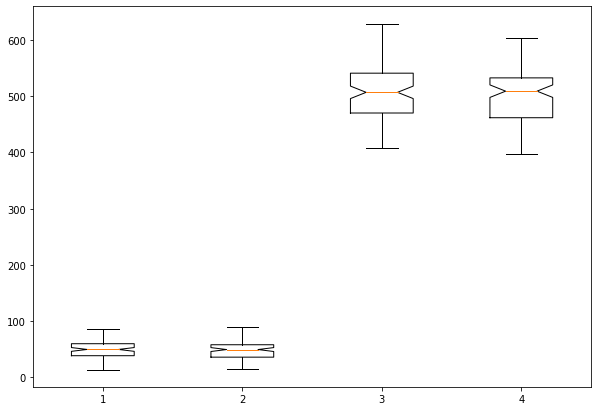

In [7]:
#Previously ...
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot ([set1, set1_s, set2, set2_s],1, '')
plt.show()

> We can use statistical hypothesis tests to confirm that our sets are from Normal Distribution Data Models. We can use the Shapiro-Wilk Normality Test:

In [5]:
# the Shapiro-Wilk Normality Test for set1
from scipy.stats import shapiro

stat, p = shapiro(data['Set1'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.992, p=0.793
Probably Gaussian


In [6]:
# the Shapiro-Wilk Normality Test for set2
from scipy.stats import shapiro

stat, p = shapiro(data['Set2'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.981, p=0.151
Probably Gaussian


> Now let's confirm that set1 and set1_s are from the same distribution. We can use the Mann-Whitney U Test for this:__

In [10]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(data['Set1'],data2['Set1s'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=4902.000, p-value at rejection =0.406
Probably the same distribution


> Let's also confirm that set2 and set2_s are from the same distribution:__

In [11]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(data['Set2'],data2['Set2s'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=4811.000, p-value at rejection =0.323
Probably the same distribution


> Based on the results we can say set1 and set1_s probably belong to the same distrubtion. The same can be stated about set2 and set2_s. Now let's check and see if set1 and set2 are SIGNIFICANTLY different or not?__

In [12]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(data['Set1'],data['Set2'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=0.000, p-value at rejection =0.000
Probably different distributions


> The test's result indicate that the set1 and set2 belong to distirbutions with different measures of central tendency (means). We can check the same for set1_s and set2_s as well:__

In [13]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(data2['Set1s'],data2['Set2s'])
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=0.000, p-value at rejection =0.000
Probably different distributions


> Now we can state at a 95% confidence level that set1 and set2 are different. The same for set1s and set2s.__

### Exercise

Repeat the analysis using [http://54.243.252.9/engr-1330-webroot/8-Labs/Lab17/lab14_E2data.csv](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab17/lab14_E2data.csv)

In [26]:
# your code here

___
### Example: 
A dataset containing marks obtained by students on basic skills like basic math and language skills (reading and writing) is collected from an educational institution and we have been tasked to give them some important inferences. 

> Hypothesis: There is no difference in means of student performance in any of basic literacy skills i.e. reading, writing, math.

___
*This is based on an example by Joju John Varghese on "Hypothesis Testing for Inference using a Dataset" available @ https://medium.com/swlh/hypothesis-testing-for-inference-using-a-data-set-aaa799e94cdf. The dataset is available @ https://www.kaggle.com/spscientist/students-performance-in-exams.*

A local copy is available from [http://54.243.252.9/engr-1330-webroot/8-Labs/Lab17/StudentsPerformance.csv](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab17/StudentsPerformance.csv)

In [27]:
import requests # Module to process http/https requests
remote_url="http://54.243.252.9/engr-1330-webroot/8-Labs/Lab17/StudentsPerformance.csv"  # set the url
rget = requests.get(remote_url, allow_redirects=True)  # get the remote resource, follow imbedded links
open('StudentsPerformance.csv','wb').write(rget.content); # extract from the remote the contents, assign to a local file same name

In [28]:
df = pd.read_csv("StudentsPerformance.csv") 
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [29]:
df.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [30]:
set1 = df['math score']
set2 = df['reading score']
set3 = df['writing score']

/opt/jupyterhub/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/jupyterhub/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/opt/jupyterhub/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/jupyterhub/lib/python3.8/site-packages/seaborn/d

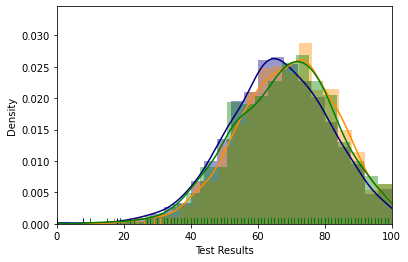

In [31]:
import seaborn as sns
sns.distplot(set1,color='navy', rug=True)
sns.distplot(set2,color='darkorange', rug=True)
sns.distplot(set3,color='green', rug=True)
plt.xlim(0,100)
plt.xlabel('Test Results');

It seems that all three samples have the same population means and it seems there is no significant difference between them at all. Let's set the null and alternative hypothesis:

> Ho: There is no difference in performance of students between math, reading and writing skills. <br>
Ha: There is a difference in performance of students between math, reading and writing skills. <br>

In [32]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(set1,set2)
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=441452.500, p-value at rejection =0.000
Probably different distributions


In [33]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(set1,set3)
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=461212.500, p-value at rejection =0.001
Probably different distributions


In [34]:
from scipy.stats import mannwhitneyu # import a useful non-parametric test
stat, p = mannwhitneyu(set2,set3)
print('statistic=%.3f, p-value at rejection =%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

statistic=480672.000, p-value at rejection =0.067
Probably the same distribution


In [35]:
from scipy.stats import kruskal
stat, p = kruskal(set1, set2, set3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

Statistics=21.225, p=0.000
Probably different distributions


___

### Example: Times Roman or Times New Roman- That is the question! <br>
![](https://media-exp1.licdn.com/dms/image/C4E1BAQEr76SyZsyo2w/company-background_10000/0/1553614927942?e=2159024400&v=beta&t=UKNhG-wjqdLnaYir1kVvVRyHdJodkMriZe_Wltqp424) <br>
#### The Daily Planet newspaper is considering swiching from the Times Roman Font to the Times New Roman as an attempt to to make it easier for their audience to read the newspaper and hence, increase the online purchases. 
*hint: The Daily Planet is a fictional broadsheet newspaper appearing in American comic books published by DC Comics, commonly in association with Superman. Read more @ https://en.wikipedia.org/wiki/Daily_Planet<br>

![](https://news-cdn.softpedia.com/images/fitted/620x/Times-New-Roman-The-Newpaper-Font-That-Took-Over-Windows-480938-3.jpg) <br>

#### They have prepared two versions of their newspapers, one of each font. On the first day, they had a total of 1398 visitors. Randonmly, half of them (699 visitors) saw the original version (Time Roman) and the other half saw the alternative version (Times New Roman).    <br>
#### The first group purchased a total of 175 copies of the newspaper. This number was 200 copies for the second group. Based on the observations of the first day, first, calculate the purchase rate for each group and then, decide whether the Daily Planet should change their font in order to increase the online engagement time?    <br>

In [36]:
#Day 1
group1= 699
group2= 699
sold1= 175
sold2 = 200
rate1=  sold1/group1
rate2 = sold2/group2

print(f"The ratio for the first group is {rate1:0.4f} copies sold per person")
print(f"The ratio for the second group is {rate2:0.4f} copies sold per person")
from scipy.stats import mannwhitneyu
import numpy as np
a_dist = np.zeros(group1)
a_dist[:sold1] = 1
b_dist = np.zeros(group2)
b_dist[:sold2] = 1

stat, p_value = mannwhitneyu(a_dist, b_dist, alternative="less")
print(f"Probability from Mann-Whitney U test for B <= A is {1.0-p_value:0.3f}")

The ratio for the first group is 0.2504 copies sold per person
The ratio for the second group is 0.2861 copies sold per person
Probability from Mann-Whitney U test for B <= A is 0.934


#### After a week, they had a total of 10086 visitors. Randonmly, half of them (5043 visitors) saw the original version (Time Roman) and the other half saw the alternative version (Times New Roman).    <br>
#### The first group purchased a total of 1072 copies of the newspaper. This number was 1190 copies for the second group. Based on the observations of the first week, first, calculate the purchase rate for each group and then, decide whether the Daily Planet should change their font in order to increase the online engagement time?    <br>

In [37]:
#Week 1
group1= 5043
group2= 5043
sold1= 1072
sold2 = 1190
rate1=  sold1/group1
rate2 = sold2/group2

print(f"The ratio for the first group is {rate1:0.3f} copies sold per person")
print(f"The ratio for the second group is {rate2:0.3f} copies sold per person")
from scipy.stats import mannwhitneyu
import numpy as np
a_dist = np.zeros(group1)
a_dist[:sold1] = 1
b_dist = np.zeros(group2)
b_dist[:sold2] = 1

stat, p_value = mannwhitneyu(a_dist, b_dist, alternative="less")
print(f"Probability from Mann-Whitney U test for B <= A is {1.0-p_value:0.3f}")

The ratio for the first group is 0.213 copies sold per person
The ratio for the second group is 0.236 copies sold per person
Probability from Mann-Whitney U test for B <= A is 0.998


#### After a month, they had a total of 42000 visitors. Randonmly, half of them (21000 visitors) saw the original version (Time Roman) and the other half saw the alternative version (Times New Roman).    <br>
#### The first group purchased a total of 4300 copies of the newspaper. This number was 5700 copies for the second group. Based on the observations of the first month, first, calculate the purchase rate for each group and then, decide whether the Daily Planet should change their font in order to increase the online engagement time?    <br>

In [38]:
#Month 1
group1= 21000
group2= 21000
sold1= 4300
sold2 = 5700
rate1=  sold1/group1
rate2 = sold2/group2

print(f"The ratio for the first group is {rate1:0.3f} copies sold per person")
print(f"The ratio for the second group is {rate2:0.3f} copies sold per person")
from scipy.stats import mannwhitneyu
import numpy as np
a_dist = np.zeros(group1)
a_dist[:sold1] = 1
b_dist = np.zeros(group2)
b_dist[:sold2] = 1

stat, p_value = mannwhitneyu(a_dist, b_dist, alternative="less")
print(f"Probability from Mann-Whitney U test for B <= A is {1.0 - p_value:0.15f}")

The ratio for the first group is 0.205 copies sold per person
The ratio for the second group is 0.271 copies sold per person
Probability from Mann-Whitney U test for B <= A is 1.000000000000000


___
![](https://media2.giphy.com/media/5nj4ZZWl6QwneEaBX4/source.gif) <br>


__*Here are some great reads on this topic:*__ 
- __"Hypothesis testing in Machine learning using Python"__ by __Yogesh Agrawal__ available at *https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce* <br>
- __"Quick Guide To Perform Hypothesis Testing"__ available at *https://www.analyticsvidhya.com/blog/2020/12/quick-guide-to-perform-hypothesis-testing/*<br>
- __"A Gentle Introduction to Statistical Hypothesis Testing"__ by __Jason Brownlee__ available at *https://machinelearningmastery.com/statistical-hypothesis-tests/*<br>
- __"17 Statistical Hypothesis Tests in Python (Cheat Sheet)"__ by __Jason Brownlee__ available at *https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/*<br>


__*Some great reads on A/B Testing:*__
-  __"Implementing A/B Tests in Python"__ by __Robbie Geoghegan__ available at* https://medium.com/@robbiegeoghegan/implementing-a-b-tests-in-python-514e9eb5b3a1 <br>
-  __"The Math Behind A/B Testing with Example Python Code"__ by __Nguyen Ngo__ available at* https://towardsdatascience.com/the-math-behind-a-b-testing-with-example-code-part-1-of-2-7be752e1d06f <br>
-  __"A/B Testing"__ available at* https://www.optimizely.com/optimization-glossary/ab-testing/ <br>
-  __"A/B Testing Guide"__ available at* https://vwo.com/ab-testing/ <br>

__*Some great videos:*__
-  __"What is A/B Testing? | Data Science in Minutes"__ by __Data Science Dojo__ available at* https://www.youtube.com/watch?v=zFMgpxG-chM <br>
-  __"A/B Testing Intro: Why, What, Where, & How to A/B Test"__ by __Testing Theory__ available at* https://www.youtube.com/watch?v=CH89jd4haRE <br>
-  __"A/B Testing"__ by __Udacity__ available at* https://www.youtube.com/watch?v=8H6QmMQWPEI <br>
- __"Statistical Hypothesis Testing- Data Science with Python"__ by __Technology for Noobs__ available at *https://www.youtube.com/watch?v=kd6zKBa9Rfk* <br>
- __"Hypothesis Testing, p-value & Confidence Intervals, Exploratory Data Analysis In Python Statistics"__ by __TheEngineeringWorld__ available at *https://www.youtube.com/watch?v=kz1IXqcFVCo* <br>
- __"Python Tutorial : Hypothesis tests"__ by __DataCamp__ available at *https://www.youtube.com/watch?v=6wbldEMpRXc* <br>

![](http://img.picturequotes.com/2/124/123499/one-finds-the-truth-by-making-a-hypothesis-and-comparing-observations-with-the-hypothesis-quote-1.jpg)